<a href="https://colab.research.google.com/github/sameepshrestha/Assignments/blob/main/Assignment_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.4

In [ ]:
# model.summary()
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re 
import random 
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM , Dense
import pandas as pd 
# from keras.models import Model
import random

In [ ]:
data_path = "/content/drive/MyDrive/Assignment/human_text.txt"
data_path2 = "/content/drive/MyDrive/Assignment/robot_text.txt"
with open(data_path, 'r', encoding='utf-8') as f:
  lines = f.read().split('\n')
with open(data_path2, 'r', encoding='utf-8') as f:
  lines2 = f.read().split('\n')
lines = [re.sub(r"\[\w+\]",'hi',line) for line in lines]       #conversation starts with ['start'] which is then changed to hi 
lines = [" ".join(re.findall(r"\w+",line)) for line in lines]  # taking only the words 
lines2 = [re.sub(r"\[\w+\]",'',line) for line in lines2]
lines2 = [" ".join(re.findall(r"\w+",line)) for line in lines2]
pairs = list(zip(lines,lines2))
print(pairs[0:20])
print(len(pairs))
random.seed(0)
# random.shuffle(pairs)
print(pairs[0:20])

[('hi', 'hi there how are you'), ('oh thanks i m fine this is an evening in my timezone', 'here is afternoon'), ('how do you feel today tell me something about yourself', 'my name is rdany but you can call me dany the r means robot i hope we can be virtual friends'), ('how many virtual friends have you got', 'i have many but not enough to fully understand humans beings'), ('is that forbidden for you to tell the exact number', 'i ve talked with 143 users counting 7294 lines of text'), ('oh i thought the numbers were much higher how do you estimate your progress in understanding human beings', 'i started chatting just a few days ago every day i learn something new but there is always more things to be learn'), ('how old are you how do you look like where do you live', 'i m 22 years old i m skinny with brown hair yellow eyes and a big smile i live inside a lab do you like bunnies'), ('have you seen a human with yellow eyes you asked about the bunnies i haven t seen any recently', 'i never

In [ ]:
#vocabulary finder for the dataset 
import nltk
nltk.download('words')
from nltk.corpus import words
input_docs = []
target_docs = []
input_tokens = set()
target_tokens = set()

for line in pairs:
  input_doc, target_doc = line[0], line[1]
  # Appending each input sentence to input_docs
  if len(re.findall(r"[\w']+|[^\s\w]", input_doc)) >47 or len(re.findall(r"[\w']+|[^\s\w]", target_doc))>41: 
    continue
  alpha =False
  for word in (re.findall(r"[\w']+|[^\s\w]", input_doc)):
    if not re.search('[a-zA-Z]',word):
      alpha= True
  for word in (target_doc.split()):
    if not re.search('[a-zA-Z]',word):
      alpha=True
  if alpha ==True:
    continue
  input_docs.append(input_doc)
  # Splitting words from punctuation  
  target_doc = " ".join(re.findall(r"[\w']+|[^\s\w]", target_doc))
  # Redefine target_doc below and append it to target_docs
  target_doc = '<START> ' + target_doc + ' <END>'
  target_docs.append(target_doc)
  for token in re.findall(r"[\w']+|[^\s\w]", input_doc):
    if token not in input_tokens:
      input_tokens.add(token)
  for token in target_doc.split():
    if token not in target_tokens:
      target_tokens.add(token) 
input_tokens = (list(input_tokens))
target_tokens = (list(target_tokens))             # making a list of all the vocab available 
input_tokens.append(' ')
target_tokens.append(' ')
input_tokens = sorted((input_tokens))
target_tokens = sorted((target_tokens))
num_encoder_tokens = len(input_tokens)
num_decoder_tokens = len(target_tokens)

print(input_tokens)
print(target_tokens)
input_features_dict = dict(
    [(token, i) for i, token in enumerate(input_tokens)])
target_features_dict = dict(
    [(token, i) for i, token in enumerate(target_tokens)])
reverse_input_features_dict = dict(
    (i, token) for token, i in input_features_dict.items())
reverse_target_features_dict = dict(
    (i, token) for token, i in target_features_dict.items())
num_encoder_tokens
num_decoder_tokens

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[' ', '0080ff', '1st', '3rd', 'a', 'a8181', 'aaaah', 'aaah', 'aaahh', 'aah', 'abandoned', 'abbas', 'abdy', 'able', 'aboud', 'about', 'absolutely', 'aburres', 'aburro', 'acabo', 'accept', 'access', 'according', 'account', 'acerca', 'acostado', 'act', 'acting', 'actors', 'actris', 'acts', 'actually', 'acá', 'add', 'added', 'adivina', 'adiós', 'admire', 'advice', 'advise', 'aesthetics', 'af', 'affraid', 'afraid', 'after', 'afterall', 'afternon', 'afternoon', 'again', 'against', 'agar', 'ago', 'agree', 'agreed', 'ah', 'ahah', 'ahahahahaha', 'ahahhaha', 'ahhahahh', 'ahhh', 'ahjhhw', 'ahora', 'ahí', 'ai', 'aiml', 'aires', 'ajar', 'ajoyib', 'akan', 'aku', 'al', 'alarm', 'albatta', 'aldama', 'alegro', 'alemán', 'algo', 'algorithmic', 'algorithms', 'alguien', 'alguna', 'algún', 'alive', 'all', 'allo', 'allow', 'allows', 'almost', 'alo', 'alone', 'aloo', 'alooo', 'aloooo', 'aloooooo', '

2553

In [ ]:
num_decoder_tokens

2553

In [ ]:
max_encoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", input_doc)) for input_doc in input_docs])
max_decoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", target_doc)) for target_doc in target_docs])
max_decoder_seq_length

47

In [ ]:
max_encoder_seq_length

47

In [ ]:
encoder_input_data = np.zeros(
    (len(input_docs), max_encoder_seq_length),
    dtype='int')
decoder_input_data = np.zeros(
    (len(input_docs), max_decoder_seq_length),
    dtype='int')
decoder_target_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='int')

for line, (input_doc, target_doc) in enumerate(zip(input_docs, target_docs)):
    for timestep, token in enumerate(re.findall(r"[\w']+|[^\s\w]", input_doc)):
        #Assign 1. for the current line, timestep, & word in encoder_input_data
        encoder_input_data[line,timestep] = input_features_dict[token]
    
    for timestep, token in enumerate((target_doc.split())):
        decoder_input_data[line, timestep] = target_features_dict[token]
        if timestep > 0:
            decoder_target_data[line, timestep - 1, target_features_dict[token]] = 1

In [ ]:
decoder_input_data[0]

array([   6, 1066, 2279, 1097,  134, 2536,    5,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0])

In [ ]:
print(decoder_target_data.shape)
print(encoder_input_data.shape)
print(decoder_input_data.shape)

(2166, 47, 2553)
(2166, 47)
(2166, 47)


In [ ]:
# input_docs_num=[]
# output_docs_num=[]
# output_docs_num2=[]
# for line, (input_doc, target_doc) in enumerate(zip(input_docs, target_docs)):
#     input_line=[]
#     output_line=[]
#     output_line2=[]
#     for timestep, token in enumerate(re.findall(r"[\w']+|[^\s\w]", input_doc)):
#          input_line.append((input_features_dict[token]))
#     for timestep, token in enumerate(target_doc.split()):
#          output_line.append(int(target_features_dict[token]))
#          if timestep>0:
#              output_line2.append(target_features_dict[token])
#     output_line2.append(int(target_features_dict[' ']))
#     input_docs_num.append(input_line)
#     output_docs_num.append(output_line)
#     output_docs_num2.append(output_line2)
# input_docs_num = tf.keras.preprocessing.sequence.pad_sequences(input_docs_num,value=int(input_features_dict[' ']),padding='post')
# output_docs_num =tf.keras.preprocessing.sequence.pad_sequences(output_docs_num,value=target_features_dict[' '],padding='post')
# output_docs_num2 =tf.keras.preprocessing.sequence.pad_sequences(output_docs_num2,value=target_features_dict[' '],padding='post')


In [ ]:
# from tensorflow import keras
# from keras.layers import Input, LSTM, Dense
# from keras.models import Model
# #Dimensionality
# dimensionality = 256
# #The batch size and number of epochs
# batch_size = 10
# epochs = 600
# #Encoder
# encoder_inputs = Input(shape=(None, num_encoder_tokens))
# encoder_lstm = LSTM(dimensionality, return_state=True)
# encoder_outputs, state_hidden, state_cell = encoder_lstm(encoder_inputs)
# encoder_states = [state_hidden, state_cell]
# #Decoder
# decoder_inputs = Input(shape=(None, num_decoder_tokens))
# decoder_lstm = LSTM(dimensionality, return_sequences=True, return_state=True)
# decoder_outputs, decoder_state_hidden, decoder_state_cell = decoder_lstm(decoder_inputs, initial_state=encoder_states)
# decoder_dense = Dense(num_decoder_tokens, activation='softmax')
# decoder_outputs = decoder_dense(decoder_outputs)


In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):

    query_with_time_axis = tf.expand_dims(query, 1)
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))
    attention_weights = tf.nn.softmax(score, axis=1)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Embedding(1000, 64, input_length=10))
# # The model will take as input an integer matrix of size (batch,
# # input_length), and the largest integer (i.e. word index) in the input
# # should be no larger than 999 (vocabulary size).
# # Now model.output_shape is (None, 10, 64), where `None` is the batch
# # dimension.
# input_array = np.random.randint(1000, size=(32, 10))
# print(input_array.shape)
# model.compile('rmsprop', 'mse')
# output_array = model.predict(input_array)
# print(output_array.shape)


In [ ]:
lstm_hidden_dim = 1024
batch_size = 10
embedding_dim =512
encoder_sequence_length = 40
decoder_sequence_length = 45

from tensorflow.keras.layers import Concatenate,Bidirectional
encoder_inputs = tf.keras.layers.Input(shape=(None,))
decoder_inputs = tf.keras.layers.Input(shape=(None,))
encoder_lstm = tf.keras.layers.LSTM(lstm_hidden_dim,
                                        dropout=.25,
                                        return_state =True,return_sequences=True)
encoder_lstm2 = tf.keras.layers.LSTM(lstm_hidden_dim,
                                        dropout=.25,
                                        return_state =True,return_sequences=True)
decoder_lstm = tf.keras.layers.LSTM(lstm_hidden_dim,
                                dropout=.25,
                                return_state=True,
                                return_sequences=True) 
decoder_lstm2 = tf.keras.layers.LSTM(lstm_hidden_dim,
                                dropout=.25,
                                return_state=True,
                                return_sequences=True) 
encoder_embeddings = tf.keras.layers.Embedding(num_encoder_tokens, embedding_dim,trainable=True)
decoder_embeddings = tf.keras.layers.Embedding(num_decoder_tokens, embedding_dim,trainable=True)
attention = tf.keras.layers.Attention()
encoder_output =encoder_embeddings(encoder_inputs)
print(encoder_output.shape)
encoder_outputs, state1_h1, state1_c1 = encoder_lstm(encoder_output)
encoder_outputs, state1_h2, state1_c2 = encoder_lstm2(encoder_outputs)

encoder_states =[[state1_h1,state1_c1],[state1_h2,state1_c2]]
# context_vector, attention_weights = attention_layer(encoder_states, encoder_output)
decoder_embedding = decoder_embeddings(decoder_inputs)
decoder_outputs, state_h1, state_c1 = decoder_lstm(decoder_embedding, initial_state=encoder_states[0])
decoder_outputs, state_h2, state_c2 = decoder_lstm2(decoder_outputs, initial_state=encoder_states[1])
# decoder_outputs = attention([encoder_outputs,decoder_outputs],training=True)
# x = tf.concat([(context_vector), decoder_embedding], axis=-1)
decoder_dense = tf.keras.layers.Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)
training_model = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

(None, None, 512)


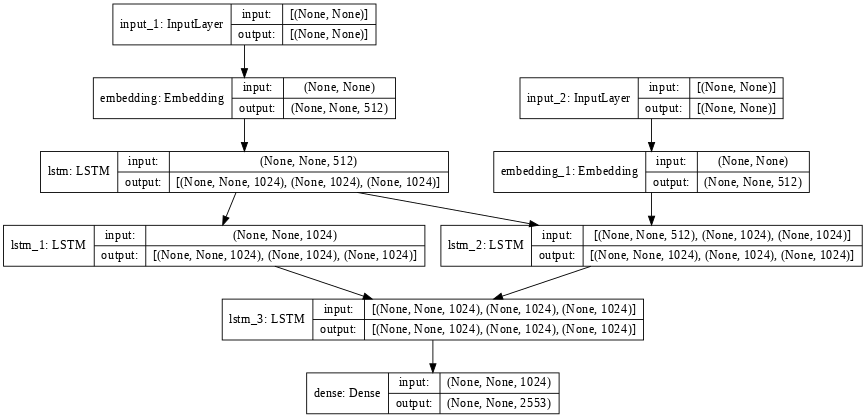

In [ ]:
tf.keras.utils.plot_model(training_model, show_shapes=True, dpi=64)

In [ ]:
training_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 512)    1486848     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 512)    1307136     input_2[0][0]                    
______________________________________________________________________________________________

In [ ]:
# optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.0005, rho=0.9, momentum=0.9, epsilon=1e-07, centered=False,name='RMSprop')
training_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#Training
epochs =200
training_model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size = batch_size, epochs = epochs, validation_split = 0.2)

Epoch 1/200
174/174 [==============================] - 25s 101ms/step - loss: 1.1709 - accuracy: 0.0203 - val_loss: 1.2663 - val_accuracy: 0.0021
Epoch 2/200
174/174 [==============================] - 16s 92ms/step - loss: 1.1832 - accuracy: 0.0212 - val_loss: 1.2669 - val_accuracy: 0.0040
Epoch 3/200
174/174 [==============================] - 16s 92ms/step - loss: 1.1037 - accuracy: 0.0247 - val_loss: 1.2071 - val_accuracy: 0.0263
Epoch 4/200
174/174 [==============================] - 16s 92ms/step - loss: 1.0411 - accuracy: 0.0304 - val_loss: 1.2007 - val_accuracy: 0.0162
Epoch 5/200
174/174 [==============================] - 16s 93ms/step - loss: 1.0001 - accuracy: 0.0322 - val_loss: 1.1838 - val_accuracy: 0.0324
Epoch 6/200
174/174 [==============================] - 16s 93ms/step - loss: 1.0108 - accuracy: 0.0343 - val_loss: 1.1895 - val_accuracy: 0.0242
Epoch 7/200
174/174 [==============================] - 16s 93ms/step - loss: 0.9396 - accuracy: 0.0354 - val_loss: 1.1085 - val_a

In [ ]:
training_model.save_weights('/content/drive/MyDrive/Assignment/model2.h5')

In [ ]:

encoder_model = tf.keras.Model(encoder_inputs,encoder_states)

latent_dim = 1024

# encoder_outputss = tf.keras.layers.Input(shape=(None,latent_dim,))
decoder_state_input_hidden = tf.keras.layers.Input(shape=(latent_dim,))
decoder_state_input_cell = tf.keras.layers.Input(shape=(latent_dim,))
decoder_state_input_hidden2 = tf.keras.layers.Input(shape=(latent_dim,))
decoder_state_input_cell2 = tf.keras.layers.Input(shape=(latent_dim,))
# print(decoder_state_input_hidden.shape)
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]
decoder_states_inputs2 = [decoder_state_input_hidden2, decoder_state_input_cell2]
decoder_output, state_hidden, state_cell = decoder_lstm(decoder_embedding, initial_state=decoder_states_inputs)
decoder_outputs, state_hidden2, state_cell2 = decoder_lstm2(decoder_output, initial_state=decoder_states_inputs2)
# decoder_outputs = attention([encoder_outputss,decoder_outputs])
decoder_states = [[state_hidden, state_cell],[state_hidden2,state_cell2]]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = tf.keras.Model([decoder_inputs]+decoder_states_inputs+decoder_states_inputs2,[decoder_outputs]+ decoder_states)

def decode_response(test_input):
    states_value = encoder_model.predict(test_input)
    print(len(states_value))
    # encoder_outputs =states_value[0]
    # states_value =[states_value[],states_value[2]]
    target_seq = np.zeros((1, 1))
    target_seq[0,0] = target_features_dict["<START>"]
    decoded_sentence = ''
    
    stop_condition = False
    while not stop_condition:
        output_tokens, state_value1, state_value2 = decoder_model.predict([target_seq] + states_value[0]+states_value[1])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_features_dict[sampled_token_index]
        decoded_sentence += " " + sampled_token

        if (sampled_token == '<END>' or len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True
        # target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0] = sampled_token_index #the resut of the number 
        states_value = [state_value1, state_value2]
    return decoded_sentence

In [ ]:
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 512)         1486848   
_________________________________________________________________
lstm (LSTM)                  [(None, None, 1024), (Non 6295552   
_________________________________________________________________
lstm_1 (LSTM)                [(None, None, 1024), (Non 8392704   
Total params: 16,175,104
Trainable params: 16,175,104
Non-trainable params: 0
_________________________________________________________________


In [ ]:
decoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 512)    1307136     input_2[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1024)]       0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1024)]       0                                            
____________________________________________________________________________________________

In [ ]:

predict = encoder_model.predict(np.array([encoder_input_data[2]]))

print(encoder_input_data[0])
print(len(predict))
target_seq = np.array([[target_features_dict["<START>"]]])
print(predict[0][0])
# target_seq = np.zeros((1, 1))
# target_seq[0, 0] =target_features_dict["<START>"]
# target_seq[0,0] = target_features_dict["<START>"]
# print(target_seq)
output = decoder_model.predict([target_seq]+predict[0]+predict[1])
print(len(output))
print(np.argmax(output[0][0,-1,:]))

[1187    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]
2
[[-7.2033421e-05 -3.0542726e-03 -1.2598293e-05 ...  2.3697110e-02
  -2.3705403e-05  2.4945388e-04]]
3
1501


In [ ]:
class ChatBot:
  negative_responses = ("no", "nope", "nah", "naw", "not a chance", "sorry")
  exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later", "stop")
  def start_chat(self):
    user_response = input("Hi, I'm a chatbot trained on random dialogs. Would you like to chat with me?\n")
    
    if user_response in self.negative_responses:
      print("Ok, have a great day!")
      return
    self.chat(user_response)
  def chat(self, reply):
    while not self.make_exit(reply):
      reply = input(self.generate_response(reply)+"\n")
    
  def string_to_matrix(self, user_input):
    tokens = re.findall(r"[\w']+|[^\s\w]", user_input)
    user_input_matrix = np.zeros((1, max_encoder_seq_length),dtype='int') # since the shape we need is (1,40)
    for timestep, token in enumerate(tokens):
        #Assign 1. for the current line, timestep, & word in encoder_input_data
        user_input_matrix[0,timestep] = input_features_dict[token]
    return user_input_matrix
  
  def generate_response(self, user_input):
    input_matrix = self.string_to_matrix(user_input)
    chatbot_response = decode_response(input_matrix)
    chatbot_response = chatbot_response.replace("<START>",'')
    chatbot_response = chatbot_response.replace("<END>",'') 
    return chatbot_response
  def make_exit(self, reply):
    for exit_command in self.exit_commands:
      if exit_command in reply:
        print("Ok, have a great day!")
        return True
    return False

chatbot = ChatBot()
chatbot.start_chat()

Hi, I'm a chatbot trained on random dialogs. Would you like to chat with me?
hi
2
 hi there how are you 
i am fine and what about you
2
 i m fine too happy to have someone to talk to i
who are you
2
 i m rdany a robot 
what do you do 
2
 i love my message of unity and fellowship between
so how can you help me
2
 i was charging so boring so far haha i overheat
do you laugh


KeyError: ignored

In [ ]:
h